Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [1]:
# Load the required packages
library(tidymodels)
library(readr)
library(moderndive)



── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages


Attaching package: ‘readr’


The following object is masked from ‘package:yardstick’:

    spec


The following object is masked from ‘package:scales’:

    col_factor




We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [3]:


# Read the data from the CSV file
hate_crimes <- read_csv("http://bit.ly/2ItxYg3")



Rows: 51 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): state, median_house_inc, trump_support, unemployment, urbanization
dbl (4): share_pop_metro, hs, hate_crimes, income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_parallel_slopes()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


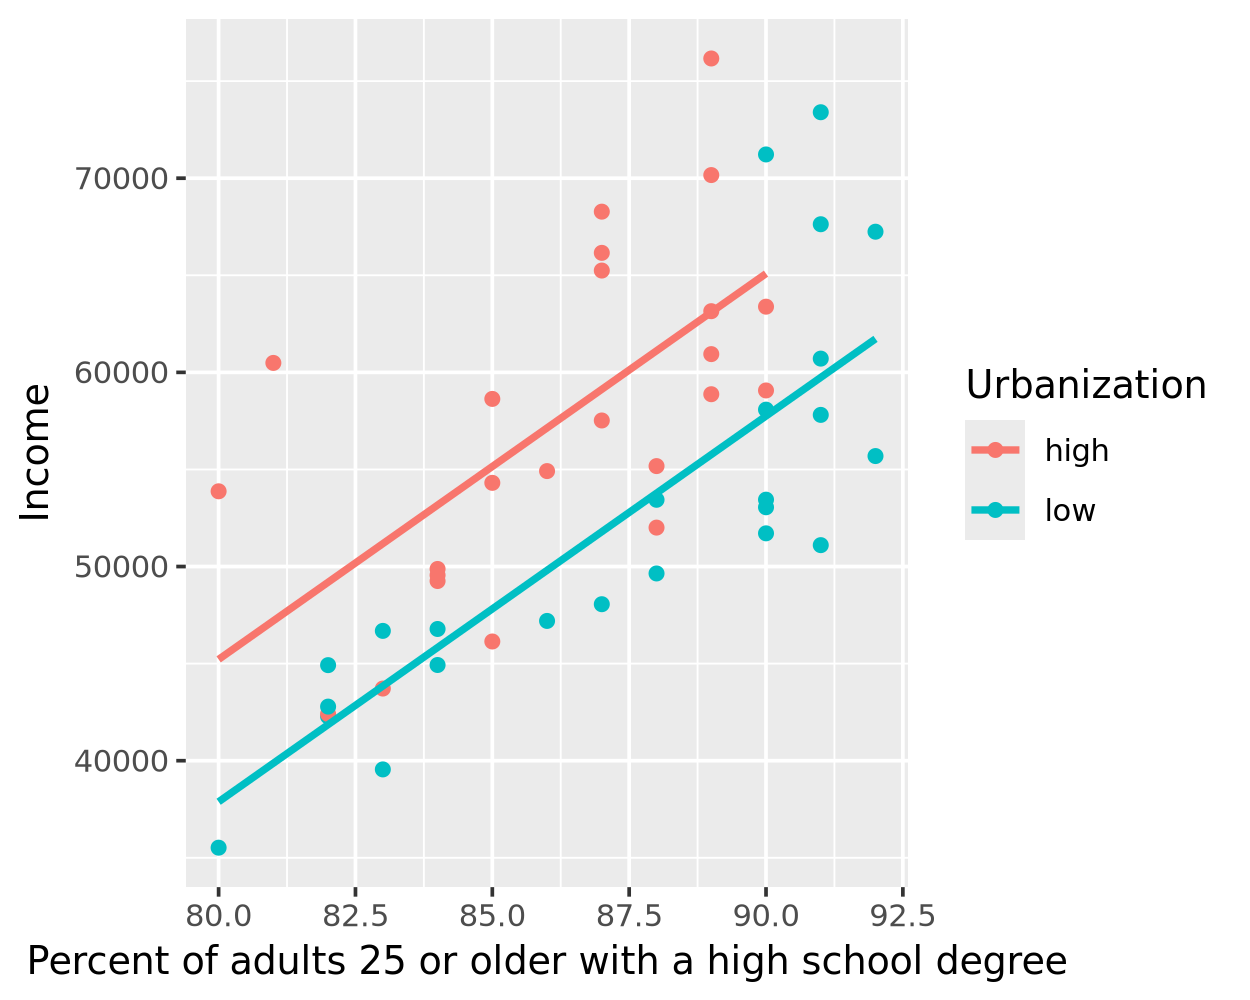

In [4]:


# Create the scatterplot with regression lines using geom_parallel_slopes
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point() +
  geom_parallel_slopes(se = FALSE) +
  labs(x = "Percent of adults 25 or older with a high school degree",
       y = "Income",
       color = "Urbanization")




❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**


Based on the plot, the regression line for high urbanization appears to have a larger intercept.


Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code you your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


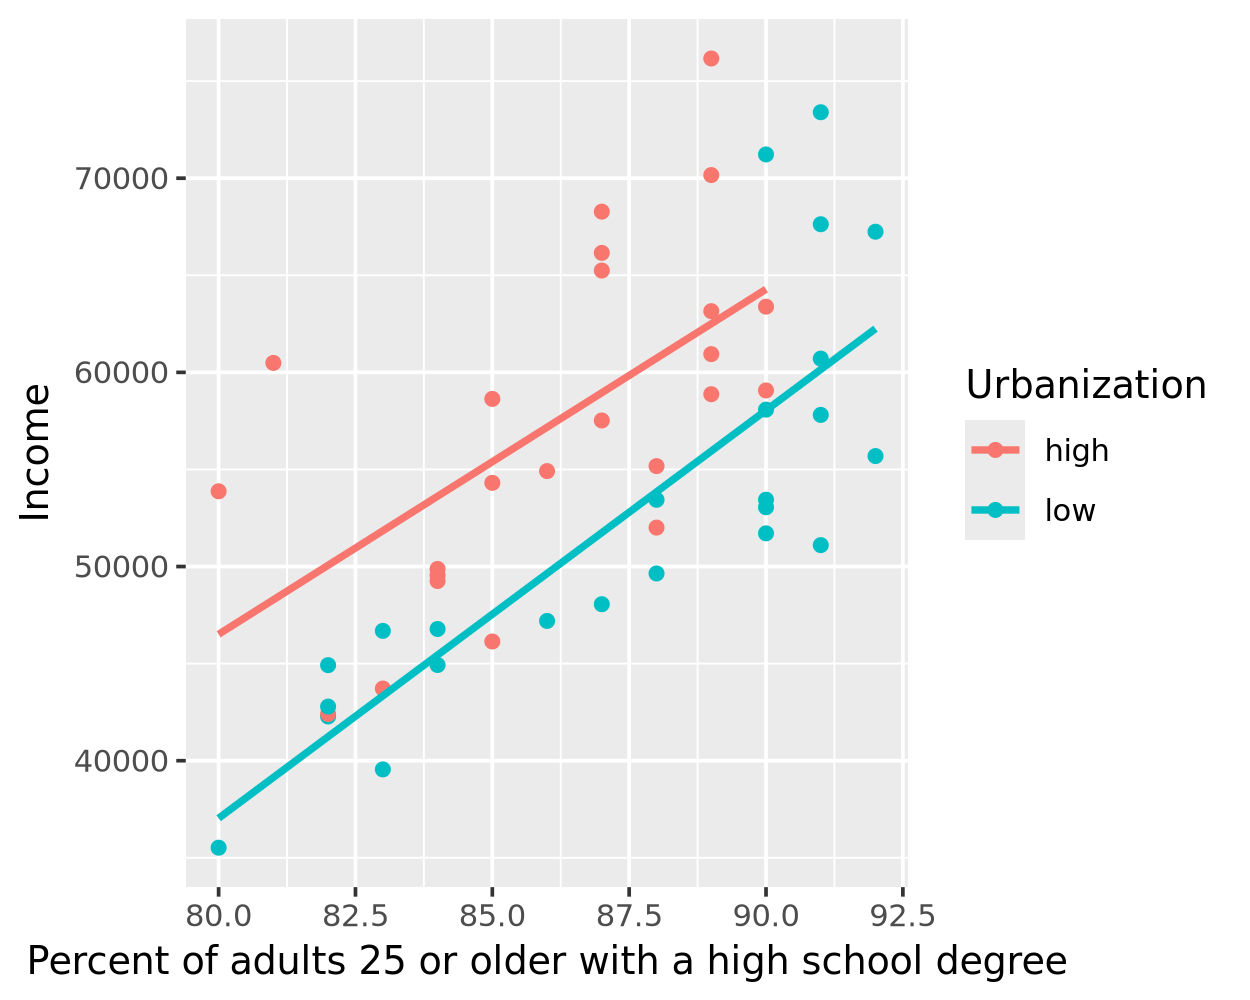

In [5]:

# Create the scatterplot with regression lines using geom_smooth
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Percent of adults 25 or older with a high school degree",
       y = "Income",
       color = "Urbanization")


❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**


Based on visually comparing the two models, the interaction model (non-parallel slopes) seems more appropriate as the slopes appear to differ between the two levels of urbanization.


Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [6]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [7]:
# non-parallel slopes model

# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...

# Non-parallel slopes model
nps_rec <- recipe(income ~ hs + urbanization, data = hate_crimes) |>
  step_naomit(everything()) |>
  step_dummy(urbanization) |>
  step_interact(~ starts_with("urbanization"):hs) |>
  prep()

nps_mod <- mod |> fit(income ~ ., juice(nps_rec))





The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [8]:


# Calculate the coefficient of determination (R2) for each model
rbind(
  augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
  augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
) |>
  group_by(model) |>
  summarize(r_squared = var(.pred) / var(income))



model,r_squared
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [ ]:
glance(ps_mod)

❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**



Based on the comparison of the adjusted R-squared values, the interaction model (non-parallel slopes) has a higher R-squared, indicating that it accounts for more variance in income. Therefore, I prefer the interaction model.

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [9]:

tidy(nps_mod)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-95647.4274,39937.8800,-2.3949050,0.0209485906
hs,1776.9938,463.2497,3.8359312,0.0003953977
urbanization_low,-35393.9651,49893.5228,-0.7093900,0.4818248864
urbanization_low_x_hs,323.9987,575.6838,0.5628067,0.5764231616


❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**


Based on the model output provided, the coefficient for the hs variable is 1776.9938. This means that for every one percentage point increase in the percentage of high-school educated adults in a state, the associated average increase in income is approximately $1,776.99, assuming all other variables remain constant.
To calculate the effect of hs on income for states with low urbanization, we need to add the coefficients for hs and urbanization_low_x_hs:

1776.9938 + 323.9987 = 2100.9925

So, for states with low urbanization, a one percentage point increase in the percentage of high-school educated adults is associated with an average increase in income of approximately $2,100.99.

